In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import numpy as np
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as sts
warnings.filterwarnings("ignore")

In [2]:
conn=sqlite3.connect("newdata.db")

df=pd.read_sql("select * from final_table",conn)
df.head()

,vendornumber,vendorname,brand,Description,volume,Actual_price,purchaseprice,total_quantity,total_dollars,total_salesquantity,total_salesdollars,total_salespricce,total_tax,freight_cost,gross_profit,profit_margin,stock_turnover,sales_to_purchase_ratio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,50.0,0.99,0.71,1,0.71,86,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,200.0,1.99,1.47,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,50.0,0.99,0.74,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,50.0,0.49,0.39,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,750.0,4.99,1.32,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667


In [3]:
df.to_csv('Final_vendor_data.csv', index=False, encoding='utf-8') 

EDA (exploratory data analysis)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10578.0,10592.951787,18701.838891,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
brand,10578.0,17960.727737,12728.046465,58.000000,5689.500000,18627.500000,25457.750000,9.063100e+04
volume,10578.0,846.996313,666.632514,50.000000,750.000000,750.000000,750.000000,2.000000e+04
Actual_price,10578.0,34.259082,126.300027,0.490000,10.990000,15.990000,28.990000,5.799990e+03
purchaseprice,10578.0,23.353710,91.896758,0.360000,6.840000,10.450000,19.370000,4.264700e+03
total_quantity,10578.0,3187.967574,11153.813253,1.000000,36.000000,282.000000,2028.750000,3.376600e+05
total_dollars,10578.0,30546.668239,123739.515834,0.710000,479.362500,3850.920000,21267.487500,3.811252e+06
total_salesquantity,10578.0,3124.730667,11010.377481,1.000000,36.000000,281.000000,1985.000000,3.349390e+05
total_salesdollars,10578.0,42886.872058,168553.495815,1.980000,809.820000,5624.045000,29516.905000,5.101920e+06
total_salespricce,10578.0,19095.997866,45178.046316,0.990000,335.092500,3028.450000,16444.005000,6.728193e+05


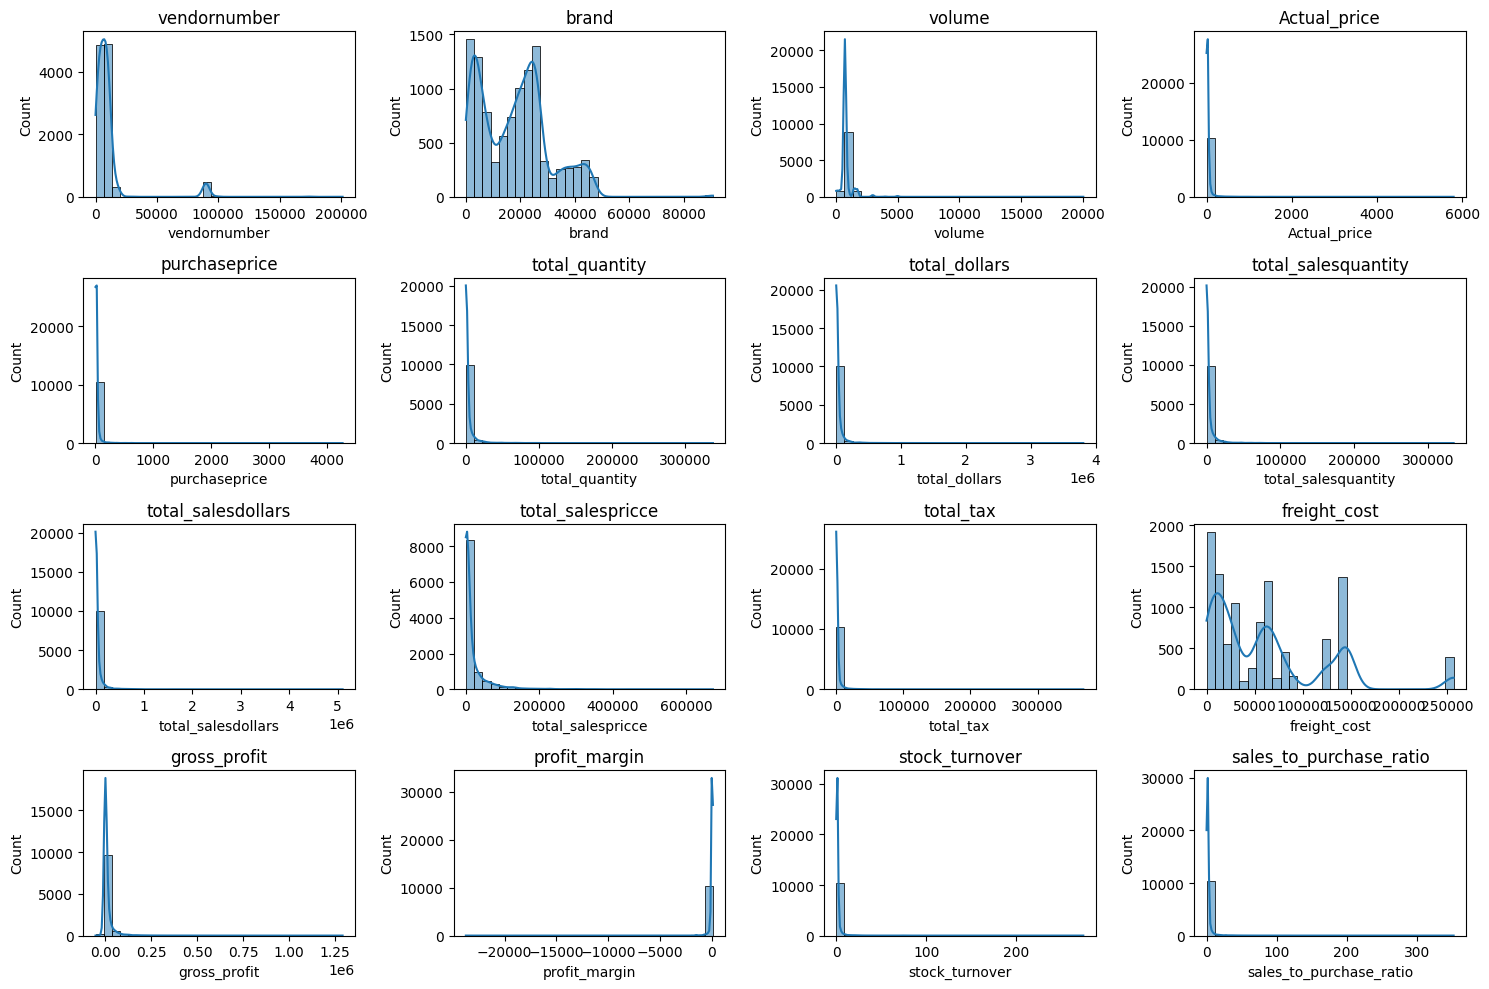

In [5]:
no_column=df.select_dtypes(include=np.number).columns

pt.figure(figsize=(15,10))

for i,col in enumerate(no_column):
    pt.subplot(4,4,i+1)
    sb.histplot(df[col],kde=True,bins=30)
    pt.title(col)
pt.tight_layout()
pt.show()

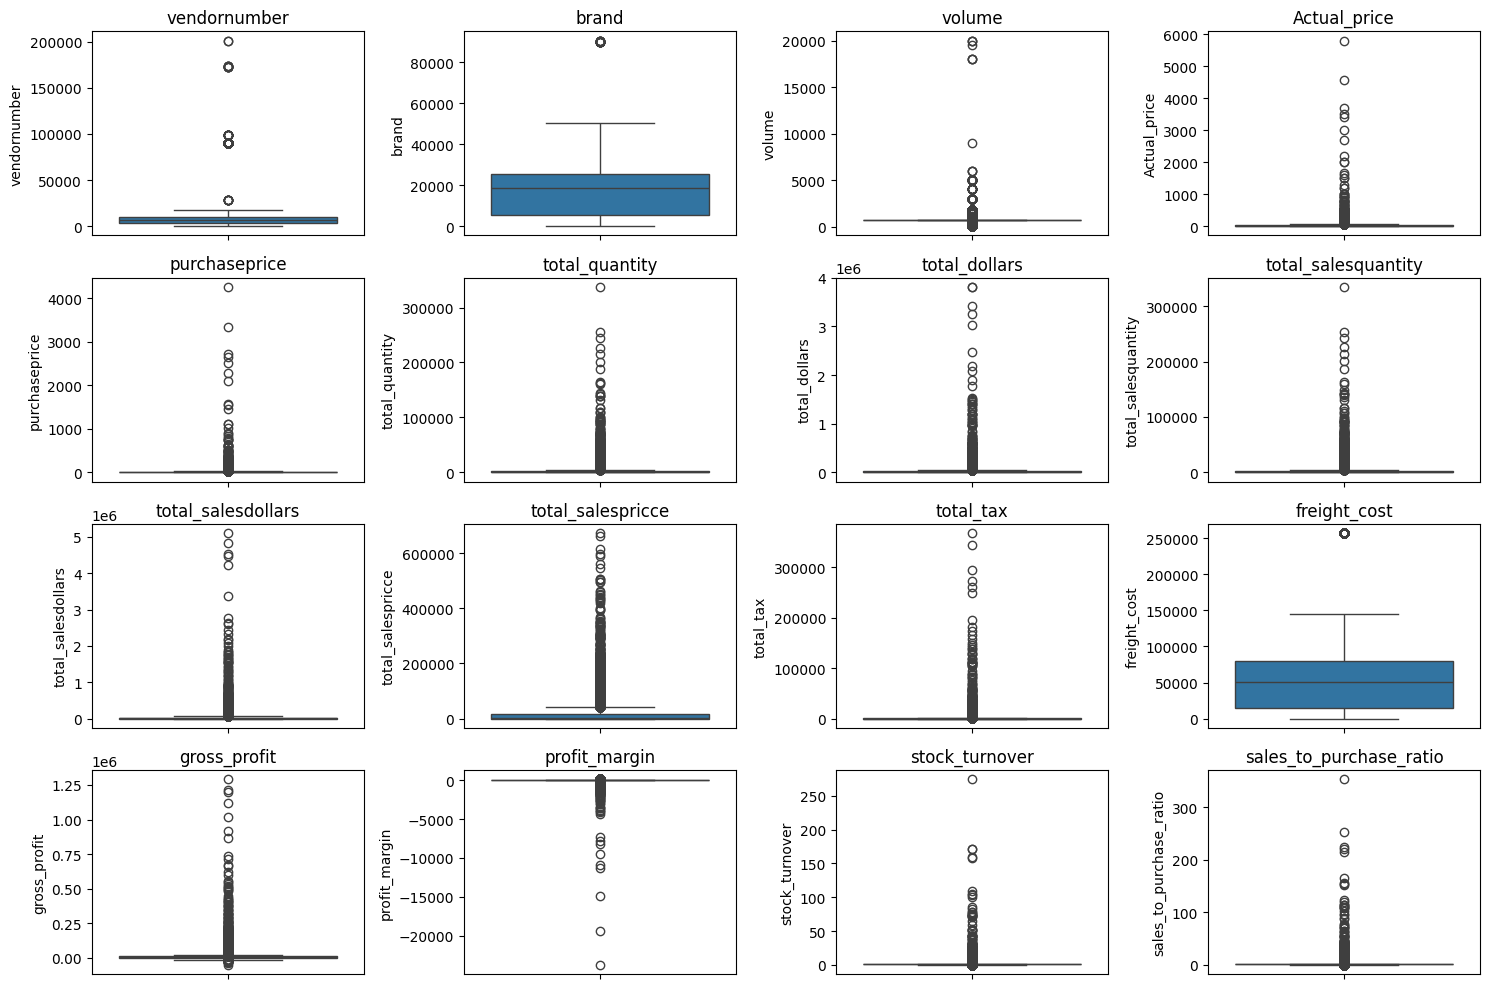

In [6]:
# to determine outlier directon

no_column=df.select_dtypes(include=np.number).columns

pt.figure(figsize=(15,10))

for i,col in enumerate(no_column):
    pt.subplot(4,4,i+1)
    sb.boxplot(y=df[col])
    pt.title(col)
pt.tight_layout()
pt.show()

In [7]:
df=pd.read_sql("""select * from final_table where gross_profit>0 and
profit_margin>0""",conn)

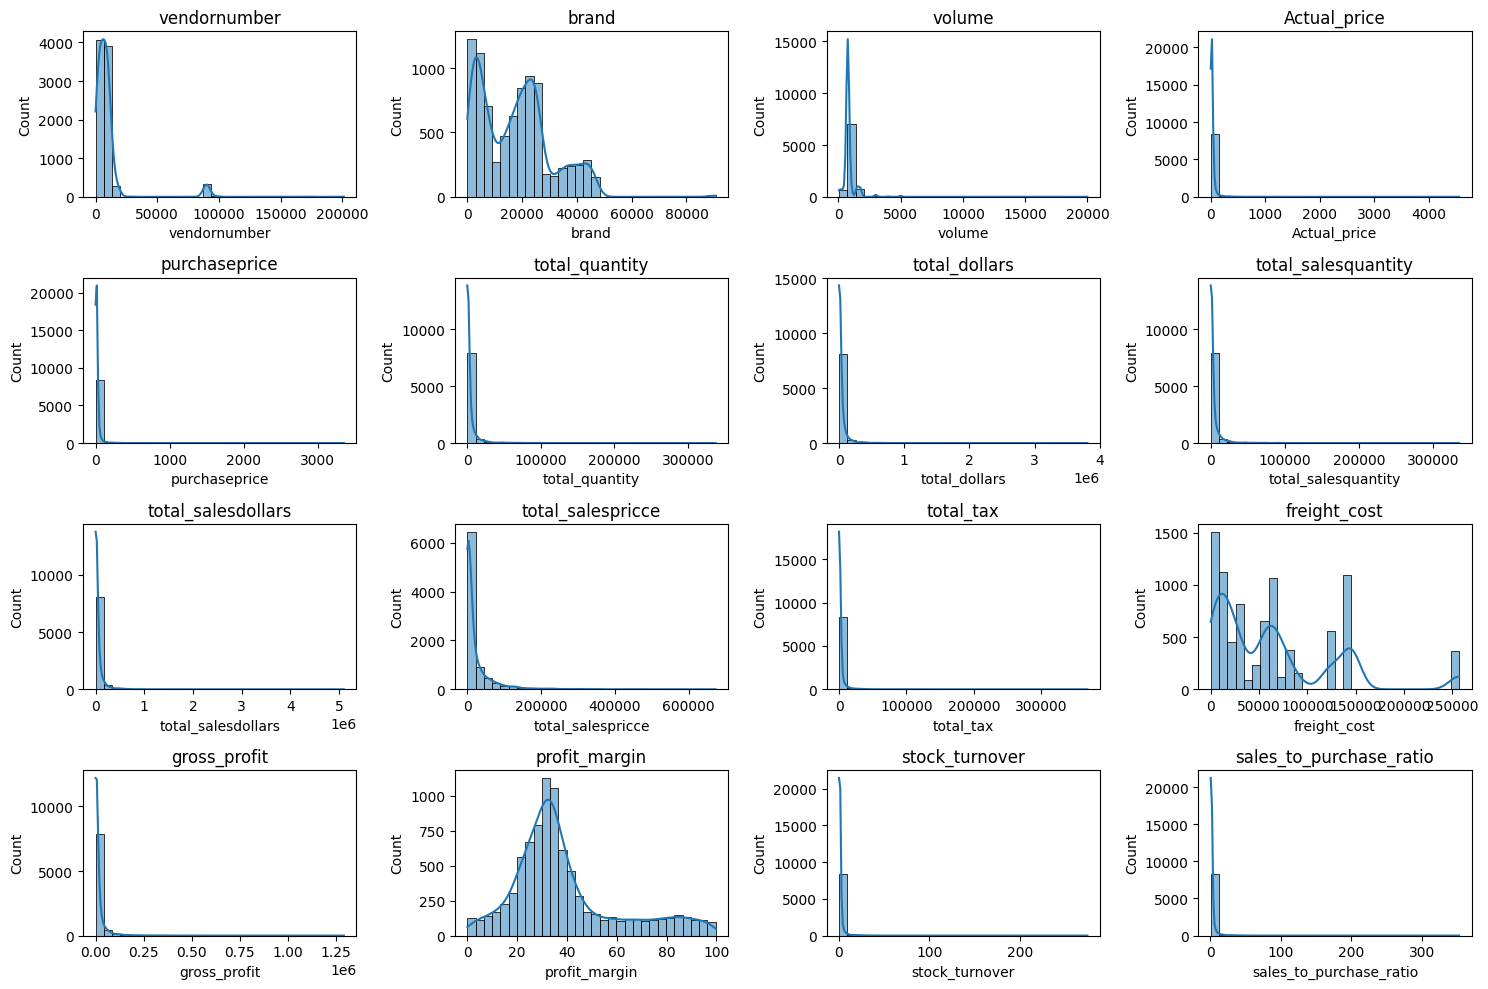

In [8]:
no_column=df.select_dtypes(include=np.number).columns

pt.figure(figsize=(15,10))

for i,col in enumerate(no_column):
    pt.subplot(4,4,i+1)
    sb.histplot(df[col],kde=True,bins=30)
    pt.title(col)
pt.tight_layout()
pt.show()

In [9]:
print(df[no_column].dtypes)

vendornumber                 int64
brand                        int64
volume                     float64
Actual_price               float64
purchaseprice              float64
total_quantity               int64
total_dollars              float64
total_salesquantity          int64
total_salesdollars         float64
total_salespricce          float64
total_tax                  float64
freight_cost               float64
gross_profit               float64
profit_margin              float64
stock_turnover             float64
sales_to_purchase_ratio    float64
dtype: object


In [10]:
df['Description'].isnull().sum()

0

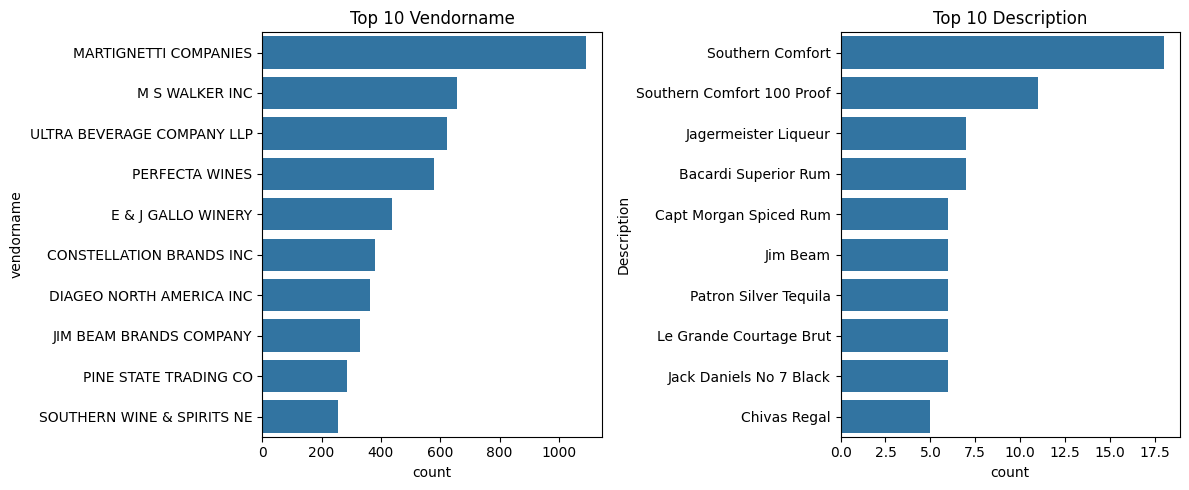

In [11]:
value = ["vendorname", "Description"]
pt.figure(figsize=(12, 5))  # Adjusted size

for i, col in enumerate(value):
    pt.subplot(1, 2, i + 1)
    sb.countplot(y=df[col], order=df[col].value_counts().index[:10])
    pt.title(f'Top 10 {col.title()}')

pt.tight_layout()
pt.show()

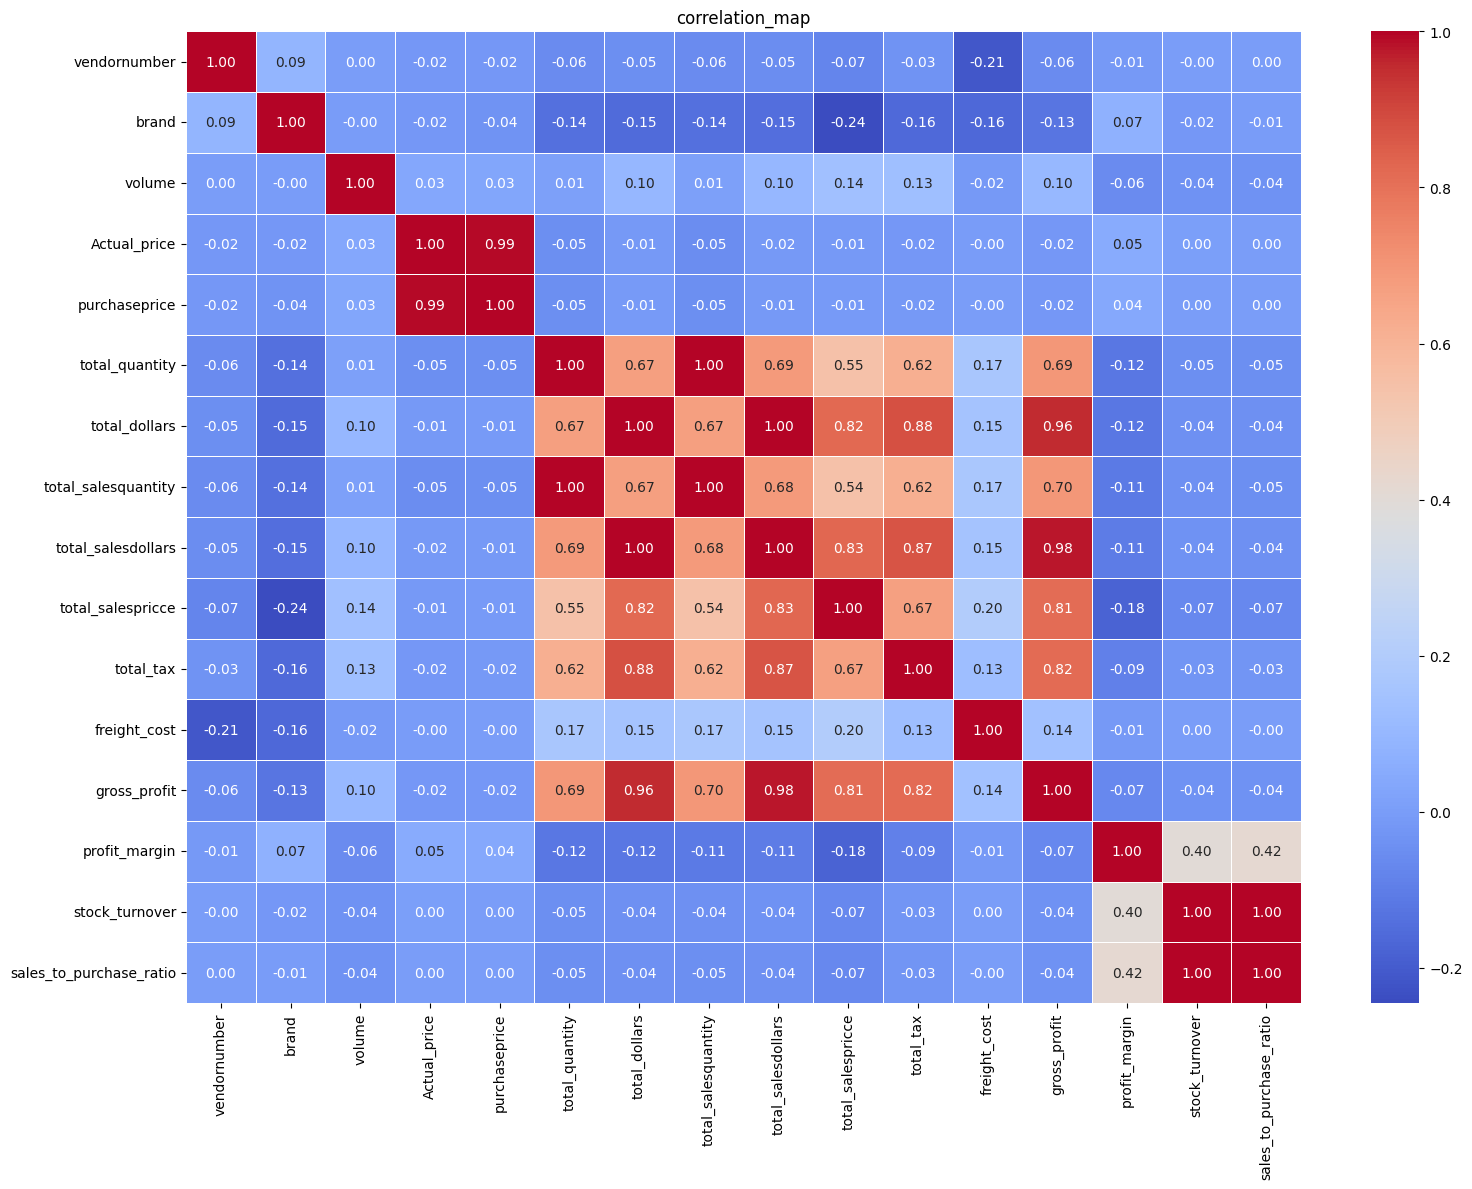

In [12]:
pt.figure(figsize=(16,12))
correlation=df[no_column].corr()
sb.heatmap(correlation,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
pt.title("correlation_map")
pt.tight_layout()
pt.show()

Correlation insights
1. purchase price has weak correlation between sales price and gross profit. so purchase peice doesnot effect sales and profit
2. we have strong correlation between total purchase quantity ans total sales quantity
3. we have negative correlation between profit margin and totalsales price. so as total sales increases  profit margin decreases 
4. stock turnover shows weak negative correlation between gross profit and profit margin. stock turnover doest much effects profit

Solve the reseach problem

identitfy the brands which need promotion and price adjustment which exibites lower sales but higher profit

In [13]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'Description', 'volume',
       'Actual_price', 'purchaseprice', 'total_quantity', 'total_dollars',
       'total_salesquantity', 'total_salesdollars', 'total_salespricce',
       'total_tax', 'freight_cost', 'gross_profit', 'profit_margin',
       'stock_turnover', 'sales_to_purchase_ratio'],
      dtype='object')

In [14]:
sales_threshold=df['total_salesdollars'].quantile(0.15)
profit_threshold=df['profit_margin'].quantile(0.85)
print(sales_threshold)
print(profit_threshold)

563.8449999999999
63.40407824927192


In [15]:
brand_performance=df.groupby('Description').agg({
    'total_salesdollars':'sum',
    'profit_margin':'mean',
}).reset_index()

brand_performance=brand_performance[brand_performance['total_salesdollars']<1000]

In [16]:
target_brands=brand_performance[
    (
        brand_performance['total_salesdollars']<=sales_threshold
    )&
    (
        brand_performance['profit_margin']>=profit_threshold
    )
]

display(target_brands.sort_values('total_salesdollars'))

,Description,total_salesdollars,profit_margin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
4741,Matanzas Creek Chard Sonoma,543.79,63.964030
6786,Svedka Grape Vodka,545.58,64.373694
6245,Sbragia Home Ranch Merlot,549.75,66.444748
3326,Goulee Cos d'Estournel 10,558.87,69.434752


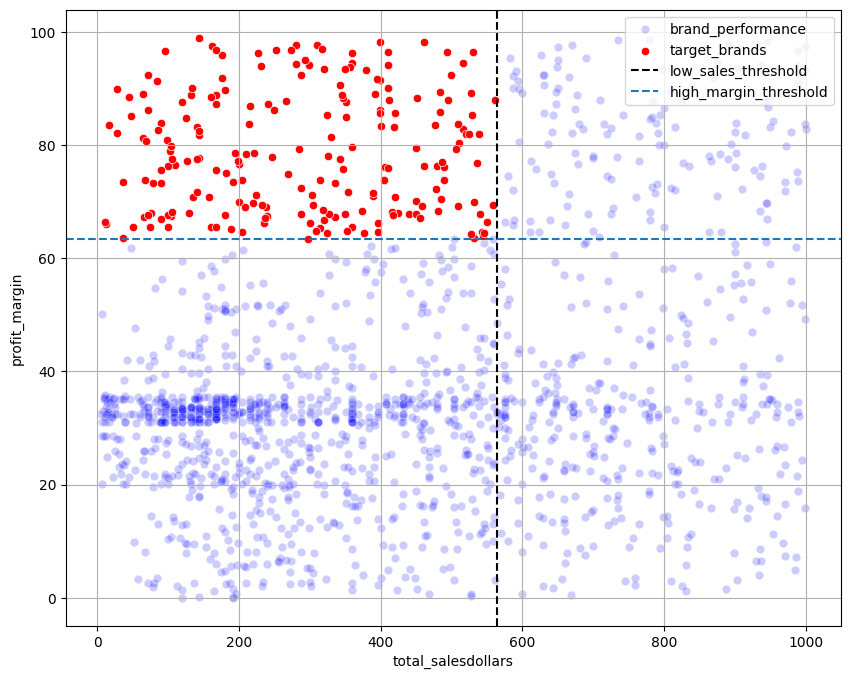

In [17]:
pt.figure(figsize=(10,8))
sb.scatterplot(data=brand_performance,x='total_salesdollars',y='profit_margin',color='blue',alpha=0.2,label='brand_performance')
sb.scatterplot(data=target_brands,x='total_salesdollars',y='profit_margin',color='red',label='target_brands')

pt.axvline(sales_threshold,linestyle='--',color='black',label='low_sales_threshold')
pt.axhline(profit_threshold,linestyle='--',label='high_margin_threshold')
pt.legend()
pt.grid(True)
pt.show()

2.which vendor and brand demonstrate highest sales performance

In [18]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'Description', 'volume',
       'Actual_price', 'purchaseprice', 'total_quantity', 'total_dollars',
       'total_salesquantity', 'total_salesdollars', 'total_salespricce',
       'total_tax', 'freight_cost', 'gross_profit', 'profit_margin',
       'stock_turnover', 'sales_to_purchase_ratio'],
      dtype='object')

In [19]:
df.columns

highest_sales_brand=df.groupby('Description')['total_salesdollars'].sum().nlargest(10)
highest_sales_vendor=df.groupby('vendorname')['total_salesdollars'].sum().nlargest(10)
highest_sales_vendor


vendorname
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39442085.10
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
BROWN-FORMAN CORP             19109282.62
E & J GALLO WINERY            18399899.46
ULTRA BEVERAGE COMPANY LLP    16532096.75
M S WALKER INC                14729943.42
Name: total_salesdollars, dtype: float64

In [20]:
highest_sales_brand

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_salesdollars, dtype: float64

In [21]:
def formating(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)


In [22]:
highest_sales_brand=highest_sales_brand.apply(lambda x:formating(x))
highest_sales_brand

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: total_salesdollars, dtype: object

In [23]:
highest_sales_vendor=highest_sales_vendor.apply(lambda y:formating(y))
highest_sales_vendor

vendorname
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.44M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
BROWN-FORMAN CORP             19.11M
E & J GALLO WINERY            18.40M
ULTRA BEVERAGE COMPANY LLP    16.53M
M S WALKER INC                14.73M
Name: total_salesdollars, dtype: object

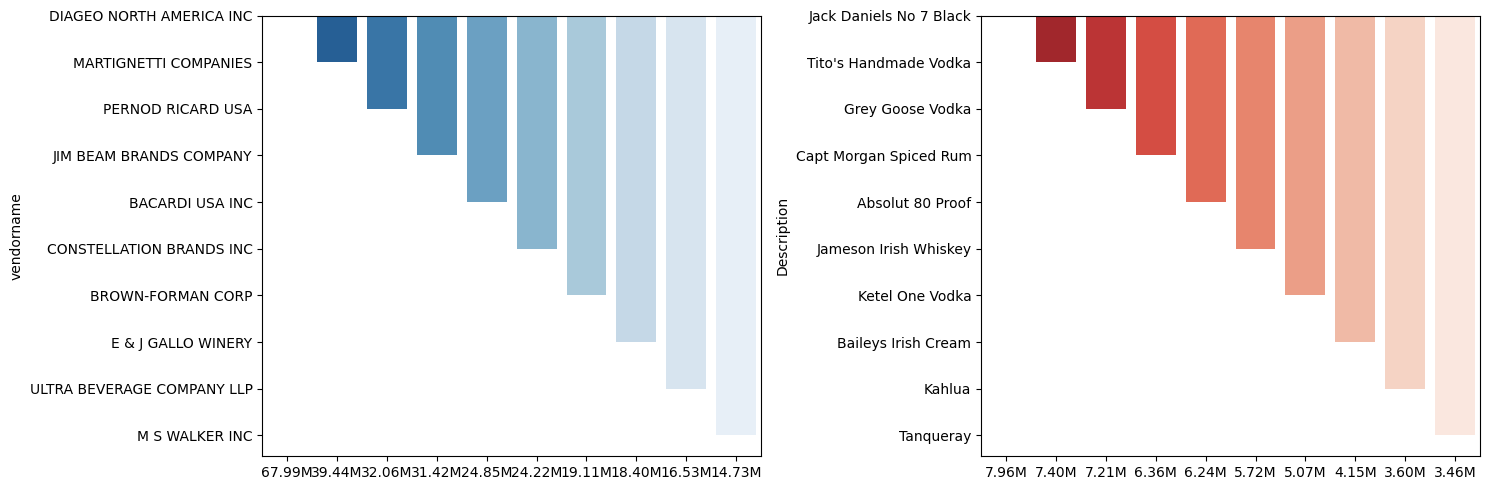

In [24]:
pt.figure(figsize=(15, 5))

pt.subplot(1, 2, 1)
ax1 = sb.barplot(
    y=highest_sales_vendor.index,  # Use y for horizontal bars
    x=highest_sales_vendor.values,
    palette='Blues_r'
)

# Annotate the bars with formatted labels
# for bar in ax1.patches:
#     ax1.text(
#         bar.get_width() + bar.get_width() * 0.01,
#         bar.get_y() + bar.get_height() / 2,
#         formating(bar.get_width()),
#         ha='left', va='center', fontsize=10, color='black'
#     )

pt.subplot(1, 2, 2)
ax2 = sb.barplot(
    y=highest_sales_brand.index.astype(str),  # Use y for horizontal bars
    x=highest_sales_brand.values,
    palette='Reds_r'
)

# for bar in ax2.patches:
#     ax2.text(
#         bar.get_width() + bar.get_width() * 0.01,
#         bar.get_y() + bar.get_height() / 2,
#         formating(bar.get_width()),
#         ha='left', va='center', fontsize=10, color='black'
#     )

pt.tight_layout()
pt.show()

which vendor contribute more to purchase dollars?

"from the heat map we can conclude that the purchase dollars have high correlation between total sales dollar and gross profit"

In [25]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'Description', 'volume',
       'Actual_price', 'purchaseprice', 'total_quantity', 'total_dollars',
       'total_salesquantity', 'total_salesdollars', 'total_salespricce',
       'total_tax', 'freight_cost', 'gross_profit', 'profit_margin',
       'stock_turnover', 'sales_to_purchase_ratio'],
      dtype='object')

In [26]:
df.columns

highest_contibution=df.groupby('vendorname').agg(
    {
        'total_dollars':'sum',
        'total_salesdollars':'sum',
        'gross_profit':'sum'
    }
).reset_index()

highest_contibution

,vendorname,total_dollars,total_salesdollars,gross_profit
0,ADAMBA IMPORTS INTL INC,446.16,704.53,258.37
1,ALISA CARR BEVERAGES,25698.12,104470.94,78772.82
2,ALTAMAR BRANDS LLC,11706.20,15706.81,4000.61
3,AMERICAN SPIRITS EXCHANGE,934.08,1511.16,577.08
4,AMERICAN VINTAGE BEVERAGE,104435.68,139603.53,35167.85
...,...,...,...,...
114,WEIN BAUER INC,42694.64,56217.13,13522.49
115,WESTERN SPIRITS BEVERAGE CO,298416.86,405254.83,106837.97
116,WILLIAM GRANT & SONS INC,5876538.26,7569876.20,1693337.94
117,WINE GROUP INC,5203801.17,8304043.28,3100242.11


In [27]:
highest_contibution['highest_contibution%']=highest_contibution['total_salesdollars']/highest_contibution['total_salesdollars'].sum()*100
highest_contibution

,vendorname,total_dollars,total_salesdollars,gross_profit,highest_contibution%
0,ADAMBA IMPORTS INTL INC,446.16,704.53,258.37,0.000159
1,ALISA CARR BEVERAGES,25698.12,104470.94,78772.82,0.023568
2,ALTAMAR BRANDS LLC,11706.20,15706.81,4000.61,0.003543
3,AMERICAN SPIRITS EXCHANGE,934.08,1511.16,577.08,0.000341
4,AMERICAN VINTAGE BEVERAGE,104435.68,139603.53,35167.85,0.031493
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,56217.13,13522.49,0.012682
115,WESTERN SPIRITS BEVERAGE CO,298416.86,405254.83,106837.97,0.091422
116,WILLIAM GRANT & SONS INC,5876538.26,7569876.20,1693337.94,1.707704
117,WINE GROUP INC,5203801.17,8304043.28,3100242.11,1.873326


In [28]:
highest_contibution=round(highest_contibution.sort_values('highest_contibution%',ascending=False),2)

totl_dependency=highest_contibution.head(10)

In [29]:
highest_contibution['total_dollars']=highest_contibution['total_dollars'].apply(formating)
highest_contibution['total_salesdollars']=highest_contibution['total_salesdollars'].apply(formating)
highest_contibution['gross_profit']=highest_contibution['gross_profit'].apply(formating)
highest_contibution

,vendorname,total_dollars,total_salesdollars,gross_profit,highest_contibution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,15.34
57,MARTIGNETTI COMPANIES,25.56M,39.44M,13.88M,8.90
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.23
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.09
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.61
...,...,...,...,...,...
44,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,665.82,474.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,342.51,265.33,0.00
33,FANTASY FINE WINES CORP,128.64,327.59,198.95,0.00
16,CAPSTONE INTERNATIONAL,54.64,246.87,192.23,0.00


In [30]:
highest_contibution.head(10)

,vendorname,total_dollars,total_salesdollars,gross_profit,highest_contibution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,15.34
57,MARTIGNETTI COMPANIES,25.56M,39.44M,13.88M,8.90
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.23
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.09
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.61
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,5.46
11,BROWN-FORMAN CORP,13.78M,19.11M,5.33M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,4.15
106,ULTRA BEVERAGE COMPANY LLP,11.19M,16.53M,5.34M,3.73
53,M S WALKER INC,9.78M,14.73M,4.95M,3.32


In [31]:
highest_contibution['cumulative%']=highest_contibution['highest_contibution%'].cumsum()
highest_contibution

,vendorname,total_dollars,total_salesdollars,gross_profit,highest_contibution%,cumulative%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,15.34,15.34
57,MARTIGNETTI COMPANIES,25.56M,39.44M,13.88M,8.90,24.24
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.23,31.47
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.09,38.56
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.61,44.17
...,...,...,...,...,...,...
44,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,665.82,474.94,0.00,99.95
85,SILVER MOUNTAIN CIDERS,77.18,342.51,265.33,0.00,99.95
33,FANTASY FINE WINES CORP,128.64,327.59,198.95,0.00,99.95
16,CAPSTONE INTERNATIONAL,54.64,246.87,192.23,0.00,99.95


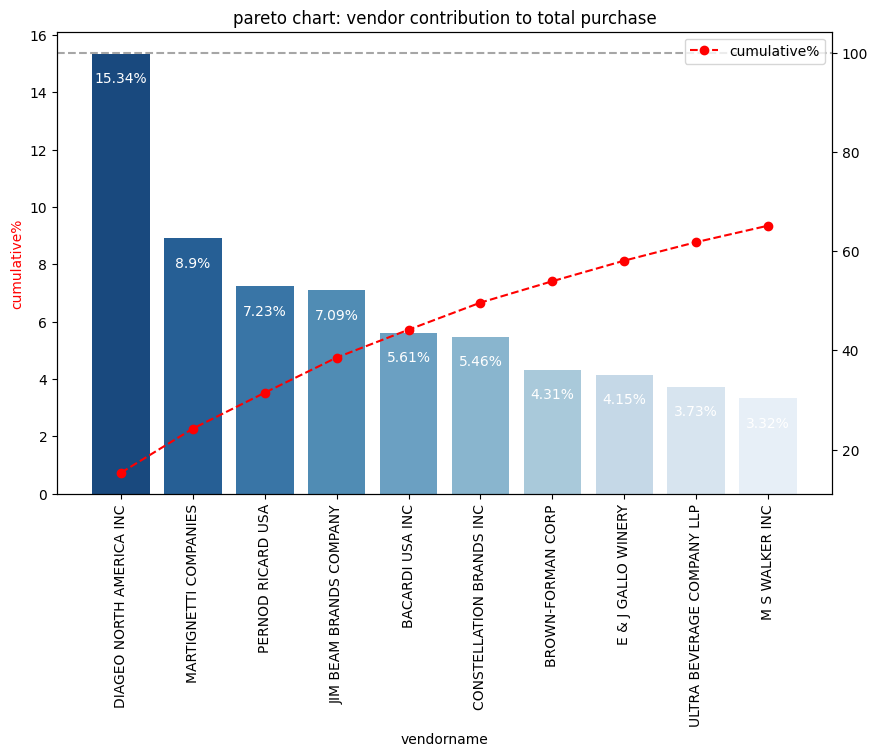

In [32]:
top_10_contibuter=highest_contibution.head(10)

fig,ax1=pt.subplots(figsize=(10,6))
sb.barplot(x=top_10_contibuter['vendorname'],y=top_10_contibuter['highest_contibution%'],palette='Blues_r',ax=ax1)

for i,value in enumerate(top_10_contibuter['highest_contibution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

ax2=ax1.twinx()
ax2.plot(top_10_contibuter['vendorname'],top_10_contibuter['cumulative%'],color='red',marker='o',linestyle='dashed',label='cumulative%')
ax1.set_xticklabels(top_10_contibuter['vendorname'],rotation=90)
ax1.set_ylabel('cumulative%',color='red')
ax1.set_title("pareto chart: vendor contribution to total purchase")
ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
ax2.plot()
pt.show()

Q3. How much of total procurement is dependent on the top vendors?

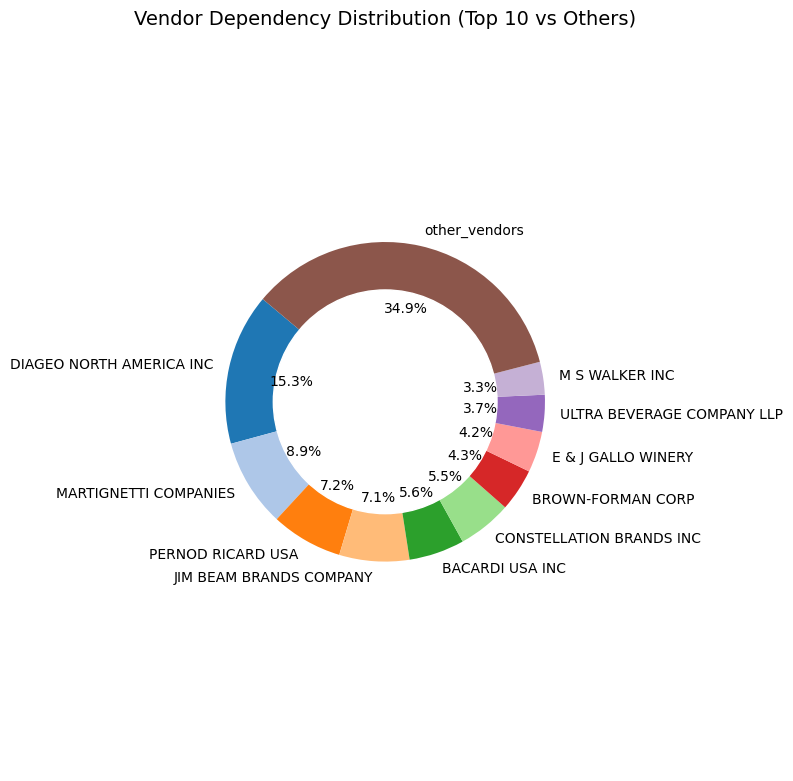

In [33]:
total_cont=round(top_10_contibuter['highest_contibution%'].sum(),2)
remaining_cont=100-total_cont
vendors=list(top_10_contibuter['vendorname'].values)
procurement=list(top_10_contibuter['highest_contibution%'].values)

vendors.append('other_vendors')
procurement.append(remaining_cont)

import matplotlib.pyplot as plt

# Define custom colors (you can change or add more)
colors = plt.cm.tab20.colors[:len(vendors)]  # A nice colormap

# Create donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    procurement,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.4},  # Creates the donut hole
    textprops={'fontsize': 10}
)

# Draw center circle for donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Title and layout
plt.title('Vendor Dependency Distribution (Top 10 vs Others)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

Q4 Does purchasing in bulk reduce the unit price, what is the optimal purchase volume for cost saving?"

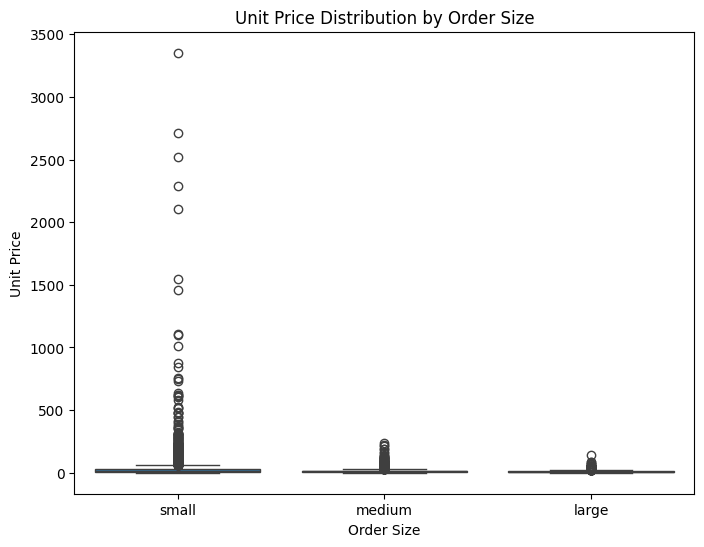

In [34]:
df.columns

import seaborn as sns
df['unite_price']=df['total_dollars']/df['total_quantity']
df['order_size']=pd.qcut(df['total_quantity'],q=3,labels=('small','medium','large'))

df.groupby('order_size')[['unite_price']].mean()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='order_size', y='unite_price', order=['small', 'medium', 'large'])

plt.title('Unit Price Distribution by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Price')

plt.show()

- This shows that the largest purchase product cost 10 per unit
- there upto approx 70 percent difference between largest purchase and smallest purchase

Which product have low inventory turnover it means high stock and lower product sale

In [35]:
df[df['stock_turnover']<1].groupby('vendorname')[['stock_turnover']].mean().sort_values('stock_turnover',ascending=True).head(10)

,stock_turnover
vendorname,
ALISA CARR BEVERAGES,0.615385
PARK STREET IMPORTS LLC,0.699412
HIGHLAND WINE MERCHANTS LLC,0.708333
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capitalis locked in unsold inventory per vendor, and which vendor contribute more

In [36]:
df['unsold_invventory_value']=(df['total_quantity']-df['total_salesquantity'])*df['purchaseprice']
df
inventory_value_per_vendor=df.groupby('vendorname')['unsold_invventory_value'].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='unsold_invventory_value',ascending=False)
inventory_value_per_vendor['unsold_invventory_value']=inventory_value_per_vendor['unsold_invventory_value'].apply(formating)
inventory_value_per_vendor.head(10)

,vendorname,unsold_invventory_value
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
79,SAZERAC CO INC,296.95k
30,E & J GALLO WINERY,228.28k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k
54,MAJESTIC FINE WINES,114.46k


what is the 95% profit intervel for profit margin of top perfroming and low performing vendors?

In [37]:
top_threshold=df['total_salesdollars'].quantile(0.75)
low_threshold=df['total_salesdollars'].quantile(0.25)
top_venodrs=df[df['total_salesdollars']>=top_threshold]['profit_margin'].dropna()
low_venodrs=df[df['total_salesdollars']<=low_threshold]['profit_margin'].dropna()
top_venodrs

3527    94.271857
3657    95.012530
3826    93.085860
4899    85.782102
5059    79.684817
          ...    
8602    28.412764
8603    27.139908
8604    24.675786
8605    21.062810
8606    25.297693
Name: profit_margin, Length: 2152, dtype: float64

In [38]:
def confidenc_intervel(data,confidence=0.5):
    mean_value=np.mean(data)
    stanadrd_div=np.std(data,ddof=1) /np.sqrt(len(data))
    t_critical=sts.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error = t_critical*stanadrd_div
    return mean_value,mean_value-margin_of_error,mean_value+margin_of_error

Top Vendors 95% CI: (31.03, 31.33), Mean: 31.18
Low Vendors 95% CI: (41.27, 42.01), Mean: 41.64


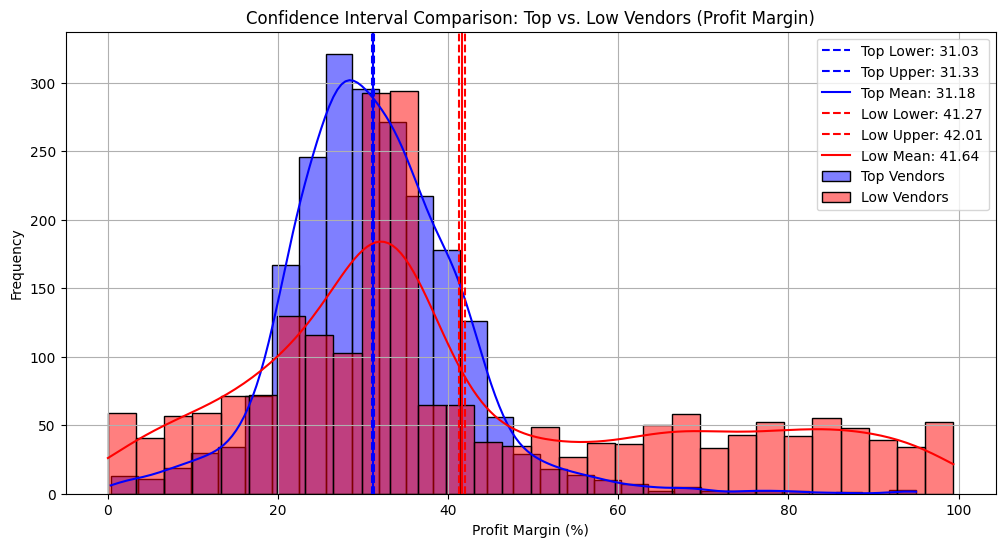

In [39]:
top_mean,top_lower,top_upper=confidenc_intervel(top_venodrs)
low_mean,low_lower,low_upper=confidenc_intervel(low_venodrs)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")
plt.figure(figsize=(12, 6))

sns.histplot(top_venodrs, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")
# Low Vendors Plot
sns.histplot(low_venodrs, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Here we can conclude that confidence intevel of low performing vendor is more than high performing vendor
- this shows thst low performing vendor makes higher profit with low sales due to premium pricing or lower oprational cost
- For High performing vendor = optimizing the pricing range is required to imporve profitability
- For Low performing vendor = better marketting startegies, promotional techniques are required to improve sales

Hypothesis testing

Is there any significant difference between Low and high performing vendors?

- H = yes thers is significant difference
- Ha = there is no significant difference



In [46]:
top_threshold=df['total_salesdollars'].quantile(0.75)
low_threshold=df['total_salesdollars'].quantile(0.25)
top_venodrs=df[df['total_salesdollars']>=top_threshold]['profit_margin'].dropna()
low_venodrs=df[df['total_salesdollars']<=low_threshold]['profit_margin'].dropna()
# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_venodrs, low_venodrs, equal_var=False)
# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject He: No significant difference in profit margins.")

T-Statistic: -17.8011, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.
